In [11]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats
import scipy.optimize

from IPython.display import display

In [12]:
path = 'san4-top-hcn4_big_3d_edt_cs320_heatmap_rowStats.csv'

df = pd.read_csv(path, header=0)

display(df.head())
display(df.tail())


,Unnamed: 0,row,colCount,min,max,sum,mean,median,std,sem,deltaF_over_f0,tifFile,tifPath
0,0,0.0,6.0,3.579197,6.750174,30.755674,5.125946,4.783928,1.063659,0.475683,-0.098263,san4-top-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py
1,1,1.0,6.0,3.548326,8.806489,37.784908,6.297485,6.461636,1.854645,0.829423,0.107830,san4-top-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py
2,2,2.0,6.0,2.954716,9.977563,31.337936,5.222990,4.692305,2.250528,1.006467,-0.081191,san4-top-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py
3,3,3.0,6.0,2.940597,7.551839,31.334724,5.222454,5.014308,1.722968,0.770535,-0.081285,san4-top-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py
4,4,4.0,6.0,3.341633,5.829673,25.259769,4.209961,3.518561,1.088729,0.486894,-0.259399,san4-top-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py


,Unnamed: 0,row,colCount,min,max,sum,mean,median,std,sem,deltaF_over_f0,tifFile,tifPath
30,9,30.0,6.0,4.497701,11.075554,35.109985,7.021997,6.552155,2.206643,1.103321,-0.130704,san4-bottom-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py
31,10,31.0,6.0,4.579202,8.977726,33.835205,6.767041,6.761076,1.619527,0.809764,-0.162266,san4-bottom-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py
32,11,32.0,6.0,5.160316,7.293835,33.026711,6.605342,6.776953,0.764598,0.382299,-0.182284,san4-bottom-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py
33,12,33.0,6.0,4.768303,7.607812,26.296436,6.574109,6.960159,1.076120,0.621298,-0.186151,san4-bottom-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py
34,13,34.0,6.0,5.364155,12.212987,35.728626,8.932157,9.075742,3.087061,1.782316,0.105767,san4-bottom-hcn4_big_3d_edt_cs320_heatmap.tif,/Users/nathan/Desktop/RowStats_py


<ipython-input-13-458b6882a2c2>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[9] = np.nan
<ipython-input-13-458b6882a2c2>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[23] = np.nan


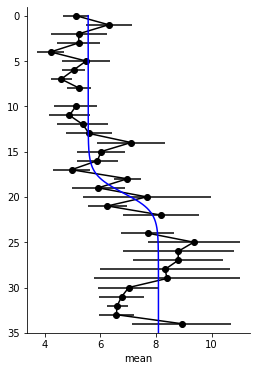

In [13]:
xStat = 'max'
xStat = 'mean'
x = df[xStat]
xSem = df['sem']
y = df['row']

yMin = 0
yMax = y.max()

def sigmoid(x, L ,x0, k, b):
    """ sigmoidal function for fitting """""
    offset = 1
    y = L / (offset + np.exp(-k*(x-x0)))+b
    return (y)

p0 = [max(x), np.median(y), 1, min(x)] # this is an mandatory initial guess

popt, pcov = scipy.optimize.curve_fit(sigmoid, y, x, p0, method='dogbox')

yFit = np.linspace(0, 35, 500)
xFit = sigmoid(yFit, *popt)

x[9] = np.nan
x[23] = np.nan

fig, ax = plt.subplots(1,1,figsize=(4,6))

ax.plot(x, y, 'o-k')
ax.errorbar(x, y, xerr=xSem, fmt='none', ecolor='k')
ax.plot(xFit, yFit, 'b-')
ax.set_xlabel(xStat)
ax.set_ylim(yMax+1, yMin-1)  # decreasing time

sns.despine()

In [5]:
#path2 = '/Users/cudmore/Sites/saNode/notebooks/hcn4Dist.csv'
path2 = 'hcn4Dist_20210125.csv'
df2 = pd.read_csv(path2, header=0)

display(df2.head())
display(df2.tail())

,Unnamed: 0,SAN,headMidTail,hcn4DistToVasc,file
0,0,SAN1,head,5.051300,SAN1_head_ch2
1,1,SAN1,head,4.101258,SAN1_head_ch2
2,2,SAN1,head,2.784233,SAN1_head_ch2
3,3,SAN1,head,0.397748,SAN1_head_ch2
4,4,SAN1,head,2.984989,SAN1_head_ch2


,Unnamed: 0,SAN,headMidTail,hcn4DistToVasc,file
749995,749995,SAN8,tail,1.778781,SAN8_tail_ch2
749996,749996,SAN8,tail,0.397748,SAN8_tail_ch2
749997,749997,SAN8,tail,2.226001,SAN8_tail_ch2
749998,749998,SAN8,tail,0.397748,SAN8_tail_ch2
749999,749999,SAN8,tail,1.193243,SAN8_tail_ch2


sanList: ['SAN1' 'SAN2' 'SAN3' 'SAN4' 'SAN8']


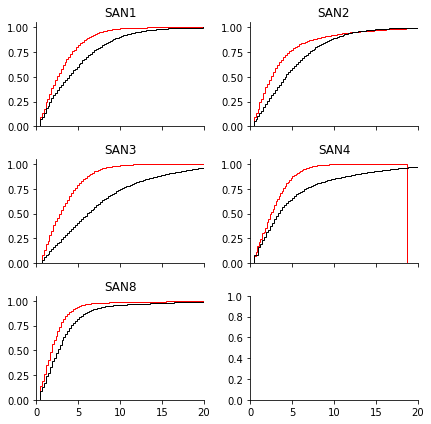

In [9]:
fig, axs = plt.subplots(3,2,figsize=(6,6), sharex=True)
axs = np.ravel(axs)

sanIdx = 0
colorList = ['r', 'k']
regionList = ['head', 'tail']
sanList = df2.SAN.unique()
print('sanList:', sanList)
for san in sanList:
    dfSan = df2[ df2['SAN'] == san]
    for regionIdx, region in enumerate(regionList):
        dfRegion = dfSan[ dfSan['headMidTail'] == region ]
        dist = dfRegion['hcn4DistToVasc']
        #print(sanIdx, len(dist))
        
        color = colorList[regionIdx]
        bins = 100
        axs[sanIdx].hist(dist, bins=bins, 
                         cumulative=True, 
                         density=True,
                         histtype='step', color=color)
        axs[sanIdx].set_title(san)
        axs[sanIdx].set_xlim(0,20)
        #axs[sanIdx].set_xlabel('HCN4 Dist To Vasc (um)')
    #
    sanIdx += 1

plt.tight_layout()
sns.despine()